CS 6316 – Machine Learning

Homework 3: Comparative Algorithmic Study

Qiyu Zhu 

Qz3ky

# Abstract

In this project, I design and construct a comparative algorithmic study using a set of learning algorithms and also perform feature selection on the data set to reduce the number of attributes used by Principal Component Analysis. Also, I use the double resampling strategy (double crossvalidation.) to work on the train and test the algorithms, the result shows the KNN worked best. 

# Data set

The dataset I used is from https://www.kaggle.com/abcsds/pokemon, named Pokémon. 
This data set includes 721 Pokemon, including their number, name, first and second type, and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed. It has been of great use when teaching statistics to kids. With certain types you can also give a geeky introduction to machine learning.

This are the raw attributes that are used for calculating how much damage an attack will do in the games. This dataset is about the pokemon games (NOT pokemon cards or Pokemon Go).

The data as described by Myles O'Neill is:

ID for each pokemon

Name: Name of each pokemon

Type 1: Each pokemon has a type, this determines weakness/resistance to attacks

Type 2: Some pokemon are dual type and have 2

Total: sum of all stats that come after this, a general guide to how strong a pokemon is

HP: hit points, or health, defines how much damage a pokemon can withstand before fainting

Attack: the base modifier for normal attacks (eg. Scratch, Punch)

Defense: the base damage resistance against normal attacks

SP Atk: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)

SP Def: the base damage resistance against special attacks

Speed: determines which pokemon attacks first each round


In [232]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("Pokemon.csv")


df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


# Experimental Design: 

I choose to use the PCA to do the feature selection on the data set to reduce the number of attributes

In [233]:
cols = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed','Total','Generation']
df_scaled = df[cols]
strs = ['Type 1','Type 2']
df_str = df[strs]
#scaler = StandardScaler().fit(df[cols])
#df_scaled = scaler.transform(df[cols])

from sklearn.decomposition import PCA
numbComponents = 3  # Adjust number of components yourself (e.g. 1, 2, ... as long as components don't exceed # features!)
pca = PCA(n_components = numbComponents)  # Selecting number of components to keep
pca.fit(df_scaled) # Fit

if numbComponents == 1:
    print('Explained variance ratio: %s' % str(pca.explained_variance_ratio_))

if numbComponents > 1: # At least two components selected
    # Percentage of variance explained for each components
    # This show how much varience is captured by the eigenvectors
    print('Explained variance ratio: %s' % str(pca.explained_variance_ratio_))
    
    print('Varience explained by the first component: {:2.2f}%'.format(pca.explained_variance_ratio_[0]*100))
    print('Varience explained by the second component: {:2.2f}% '.format(pca.explained_variance_ratio_[1]*100))
    print('Varience explained by the third component: {:2.2f}% \n'.format(pca.explained_variance_ratio_[2]*100))
df_scaled_t=pca.transform(df_scaled)
pcscores = pd.DataFrame(pca.transform(df_scaled))
pcscores.columns = ['PC'+str(i+1) for i in range(len(pcscores.columns))]
data = pd.concat([pcscores,df['Legendary']],axis=1)
data.head()



Explained variance ratio: [ 0.8529312   0.05093863  0.03690194]
Varience explained by the first component: 85.29%
Varience explained by the second component: 5.09% 
Varience explained by the third component: 3.69% 



,PC1,PC2,PC3,Legendary
0,-125.860501,-5.210221,19.047214,False
1,-32.131395,-5.769563,20.867137,False
2,97.225333,-5.394431,21.391246,False
3,206.065594,18.625954,28.970775,False
4,-135.910674,-21.593362,4.080165,False


Now we have three pca.

Results of the variable selection
we use three pca to be our new dataset, we delete the type 1 and type 2, now we only have pca1, pca2, pca3 and our target varible: 'Legendary'

# Results

I do Double-Resampling ("Double Cross-Validation") Procedure to test different model like :
• Decision Tree (DT)
• k-Nearest Neighbor (k-NN)
• Random Forests (RF)
• AdaBoost
• Support Vector Machine (SVM).
In the double-resampling procedure, firstly, I choice to use the 4 fold corss-validation in the inner cv, and 5 fold cross-validation in the outer cv.
About parameter tuning:
In the Decision Tree, I choose to tune the splitter("best","random")
In the K-nearest Neighbor I choose to tune the weights ("uniform","distance")
In the Random Forest, I choose to tune the criterion("gini","entropy")
In the AdaBoost, I choose to tune the algorithm("SAMME","SAMME.R")
In the SVM, I choose to tune the C(0.001,0.1)


In [234]:
import seaborn as sns
import matplotlib.pyplot as plt

# Decision Tree
        
    

one round of Inner-fold experiments [4-fold cross-validation]
now the splitter is  best
 acc score = 0.925
 acc score = 0.90625
 acc score = 0.95
 acc score = 0.91875

Mean acc score  0.925

one round of Inner-fold experiments [4-fold cross-validation]
now the splitter is  random
 acc score = 0.95
 acc score = 0.9375
 acc score = 0.95625
 acc score = 0.94375

Mean acc score  0.9359375

The optimal splitter  is random

the mean acc score of optimal splitter is 0.9359375

The corresponding confusion matrix is:  [[[145   7]
  [  1   7]]

 [[136   6]
  [  4  14]]

 [[143   3]
  [  4  10]]

 [[136   2]
  [  7  15]]]


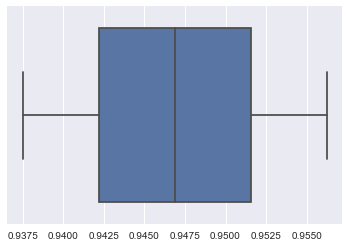


next we try our best model on the Outer-fold experiments [5-fold cross-validation]
outer acc score is  [0.96875]
outer confusion matrix is  [array([[152,   5],
       [  0,   3]])]


one round of Inner-fold experiments [4-fold cross-validation]
now the splitter is  best
 acc score = 0.95
 acc score = 0.93125
 acc score = 0.96875
 acc score = 0.8875

Mean acc score  0.934375

one round of Inner-fold experiments [4-fold cross-validation]
now the splitter is  random
 acc score = 0.95625
 acc score = 0.9125
 acc score = 0.975
 acc score = 0.925

Mean acc score  0.93828125

The optimal splitter  is random

the mean acc score of optimal splitter is 0.93828125

The corresponding confusion matrix is:  [[[152   5]
  [  2   1]]

 [[135   7]
  [  7  11]]

 [[143   3]
  [  1  13]]

 [[135   3]
  [  9  13]]]


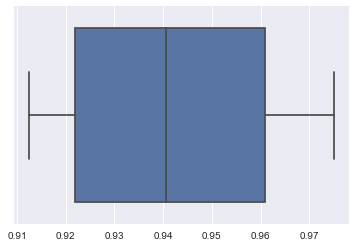


next we try our best model on the Outer-fold experiments [5-fold cross-validation]
outer acc score is  [0.94374999999999998]
outer confusion matrix is  [array([[145,   7],
       [  2,   6]])]


one round of Inner-fold experiments [4-fold cross-validation]
now the splitter is  best
 acc score = 0.975
 acc score = 0.9625
 acc score = 0.9375
 acc score = 0.925

Mean acc score  0.95

one round of Inner-fold experiments [4-fold cross-validation]
now the splitter is  random
 acc score = 0.98125
 acc score = 0.9625
 acc score = 0.94375
 acc score = 0.9375

Mean acc score  0.953125

The optimal splitter  is random

the mean acc score of optimal splitter is 0.953125

The corresponding confusion matrix is:  [[[154   3]
  [  0   3]]

 [[149   3]
  [  3   5]]

 [[143   3]
  [  6   8]]

 [[135   3]
  [  7  15]]]


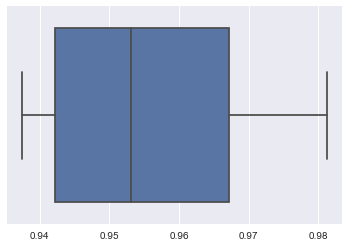


next we try our best model on the Outer-fold experiments [5-fold cross-validation]
outer acc score is  [0.96250000000000002]
outer confusion matrix is  [array([[139,   3],
       [  3,  15]])]


one round of Inner-fold experiments [4-fold cross-validation]
now the splitter is  best
 acc score = 0.94375
 acc score = 0.9625
 acc score = 0.90625
 acc score = 0.9125

Mean acc score  0.93125

one round of Inner-fold experiments [4-fold cross-validation]
now the splitter is  random
 acc score = 0.98125
 acc score = 0.9625
 acc score = 0.94375
 acc score = 0.9125

Mean acc score  0.940625

The optimal splitter  is random

the mean acc score of optimal splitter is 0.940625

The corresponding confusion matrix is:  [[[155   2]
  [  1   2]]

 [[147   5]
  [  1   7]]

 [[138   4]
  [  5  13]]

 [[134   4]
  [ 10  12]]]


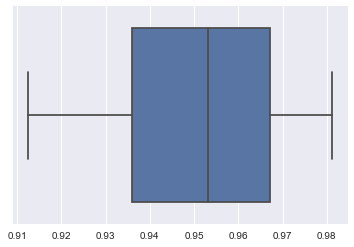


next we try our best model on the Outer-fold experiments [5-fold cross-validation]
outer acc score is  [0.96250000000000002]
outer confusion matrix is  [array([[142,   4],
       [  2,  12]])]


one round of Inner-fold experiments [4-fold cross-validation]
now the splitter is  best
 acc score = 0.98125
 acc score = 0.95625
 acc score = 0.93125
 acc score = 0.95

Mean acc score  0.9546875

one round of Inner-fold experiments [4-fold cross-validation]
now the splitter is  random
 acc score = 0.98125
 acc score = 0.95625
 acc score = 0.91875
 acc score = 0.975

Mean acc score  0.95625

The optimal splitter  is random

the mean acc score of optimal splitter is 0.95625

The corresponding confusion matrix is:  [[[154   3]
  [  0   3]]

 [[147   5]
  [  2   6]]

 [[135   7]
  [  6  12]]

 [[145   1]
  [  3  11]]]


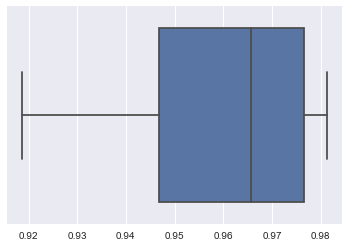


next we try our best model on the Outer-fold experiments [5-fold cross-validation]
outer acc score is  [0.9375]
outer confusion matrix is  [array([[133,   5],
       [  5,  17]])]


the total list of acc score in the outer-fold experiment is [0.96875, 0.94374999999999998, 0.96250000000000002, 0.96250000000000002, 0.9375]
and the mean of acc score in the outer-fold experiment  0.955
the boxplot for Outer-fold experiments like this 


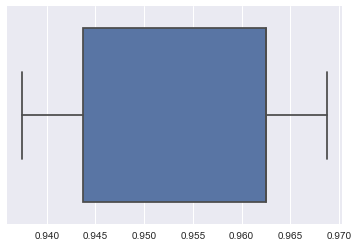

In [235]:
from sklearn import tree
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.model_selection import KFold
X=pcscores
y, _ = pd.factorize(df['Legendary'])

kf = KFold(n_splits=5)
accstotal=[]


def printing_Kfold_scores(x_train_data,y_train_data):
    fold = KFold(n_splits=4)
    
    # Different parameters
    splitter_param_range = ["best","random"]
    j = 0
    accs_mean=[]
    confusion = []
    accs = []
    for i in [0,1]:
        print('one round of Inner-fold experiments [4-fold cross-validation]')
        print('now the splitter is ',splitter_param_range[i])
    
        for train, test in fold.split(x_train_data):
            clt = tree.DecisionTreeClassifier(splitter=splitter_param_range[i])
            
            clt.fit(x_train_data.iloc[train],y_train_data[train])
            pred = clt.predict(x_train_data.iloc[test])
            acc = accuracy_score(y_train_data[test],pred)
            c_df = confusion_matrix(y_train_data[test],pred)
            accs.append(acc)
            confusion.append(c_df)
            print(' acc score =', acc)
            
        j += 1
        print('')
        print('Mean acc score ', np.mean(accs))
        print('')
        accs_mean.append(np.mean(accs))
    
   
    # determining best splitter
    optimal_k = splitter_param_range[accs_mean.index(max(accs_mean))]
    print("The optimal splitter  is %s" % optimal_k)
    print('')
    print("the mean acc score of optimal splitter is %s" % accs_mean[accs_mean.index(max(accs_mean))])
    print('')
    confustion = np.array(confusion)
    accs = np.array(accs)
    if optimal_k == "best":
        bestacc=accs[0:4]
        bestcon=confustion[0:4]
        print('The corresponding confusion matrix is: ', confustion[0:4])
    else:
        bestacc=accs[4:8]
        bestcon=confustion[4:8]
        print('The corresponding confusion matrix is: ', confustion[4:8])
    ax = sns.boxplot(x = bestacc)
    plt.show()
    print('')
    
    return optimal_k, bestcon, accs_mean
        
    
   

       

for train_index, test_index in kf.split(X):
    x_train, y_train = X.iloc[train_index], y[train_index]
    x_test, y_test = X.iloc[test_index], y[test_index]
    confusion=[]
    accs=[]
    
    inner=printing_Kfold_scores(x_train,y_train)
    print("next we try our best model on the Outer-fold experiments [5-fold cross-validation]")
    clt = tree.DecisionTreeClassifier(splitter=inner[0])
    clt.fit(x_train,y_train)
    pred = clt.predict(x_test)
    acc = accuracy_score(y_test,pred)
    c_df = confusion_matrix(y_test,pred)
    accs.append(acc)
    accstotal.append(acc)
    print("outer acc score is ", accs)
    confusion.append(c_df)
    print("outer confusion matrix is ",confusion)
    print('')
    print('')
   
    # determining best splitter
print('the total list of acc score in the outer-fold experiment is',accstotal)
print('and the mean of acc score in the outer-fold experiment ',np.mean(accstotal))
print('the boxplot for Outer-fold experiments like this ')
ax1 = sns.boxplot(x = accstotal)
plt.show()
print('')

# k-Nearest Neighbor (k-NN)

one round of Inner-fold experiments [4-fold cross-validation]
now the weights is  uniform
 acc score = 0.925
 acc score = 0.8875
 acc score = 0.96875
 acc score = 0.9375

Mean acc score  0.9296875

one round of Inner-fold experiments [4-fold cross-validation]
now the weights is  distance
 acc score = 0.925
 acc score = 0.90625
 acc score = 0.9625
 acc score = 0.9375

Mean acc score  0.93125

The optimal weight is distance

the mean acc score of optimal weight is 0.93125

The corresponding confusion matrix is:  [[[142  10]
  [  2   6]]

 [[134   8]
  [  7  11]]

 [[142   4]
  [  2  12]]

 [[134   4]
  [  6  16]]]


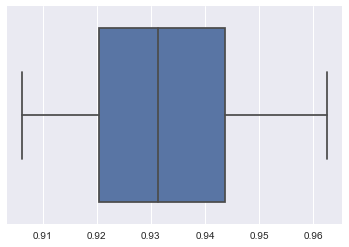


next we try our best model on the Outer-fold experiments [5-fold cross-validation]
outer acc score is  [0.98124999999999996]
outer confusion matrix is  [array([[154,   3],
       [  0,   3]])]


one round of Inner-fold experiments [4-fold cross-validation]
now the weights is  uniform
 acc score = 0.95625
 acc score = 0.90625
 acc score = 0.96875
 acc score = 0.925

Mean acc score  0.9390625

one round of Inner-fold experiments [4-fold cross-validation]
now the weights is  distance
 acc score = 0.95625
 acc score = 0.925
 acc score = 0.96875
 acc score = 0.91875

Mean acc score  0.940625

The optimal weight is distance

the mean acc score of optimal weight is 0.940625

The corresponding confusion matrix is:  [[[150   7]
  [  0   3]]

 [[136   6]
  [  6  12]]

 [[141   5]
  [  0  14]]

 [[132   6]
  [  7  15]]]


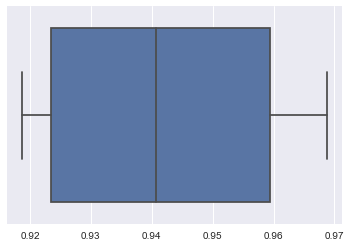


next we try our best model on the Outer-fold experiments [5-fold cross-validation]
outer acc score is  [0.94374999999999998]
outer confusion matrix is  [array([[145,   7],
       [  2,   6]])]


one round of Inner-fold experiments [4-fold cross-validation]
now the weights is  uniform
 acc score = 0.99375
 acc score = 0.9625
 acc score = 0.95
 acc score = 0.94375

Mean acc score  0.9625

one round of Inner-fold experiments [4-fold cross-validation]
now the weights is  distance
 acc score = 0.9875
 acc score = 0.95
 acc score = 0.9375
 acc score = 0.93125

Mean acc score  0.95703125

The optimal weight is uniform

the mean acc score of optimal weight is 0.9625

The corresponding confusion matrix is:  [[[156   1]
  [  0   3]]

 [[147   5]
  [  1   7]]

 [[142   4]
  [  4  10]]

 [[136   2]
  [  7  15]]]


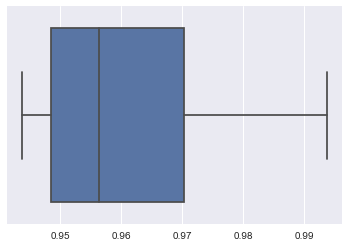


next we try our best model on the Outer-fold experiments [5-fold cross-validation]
outer acc score is  [0.90000000000000002]
outer confusion matrix is  [array([[135,   7],
       [  9,   9]])]


one round of Inner-fold experiments [4-fold cross-validation]
now the weights is  uniform
 acc score = 0.98125
 acc score = 0.95
 acc score = 0.8875
 acc score = 0.93125

Mean acc score  0.9375

one round of Inner-fold experiments [4-fold cross-validation]
now the weights is  distance
 acc score = 0.9875
 acc score = 0.94375
 acc score = 0.8875
 acc score = 0.925

Mean acc score  0.93671875

The optimal weight is uniform

the mean acc score of optimal weight is 0.9375

The corresponding confusion matrix is:  [[[155   2]
  [  1   2]]

 [[146   6]
  [  2   6]]

 [[133   9]
  [  9   9]]

 [[135   3]
  [  8  14]]]


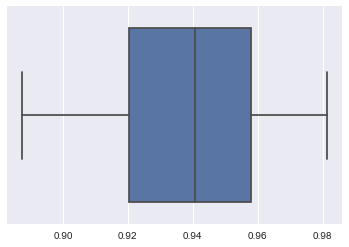


next we try our best model on the Outer-fold experiments [5-fold cross-validation]
outer acc score is  [0.97499999999999998]
outer confusion matrix is  [array([[144,   2],
       [  2,  12]])]


one round of Inner-fold experiments [4-fold cross-validation]
now the weights is  uniform
 acc score = 0.975
 acc score = 0.95625
 acc score = 0.9125
 acc score = 0.9625

Mean acc score  0.9515625

one round of Inner-fold experiments [4-fold cross-validation]
now the weights is  distance
 acc score = 0.975
 acc score = 0.95625
 acc score = 0.9125
 acc score = 0.95625

Mean acc score  0.95078125

The optimal weight is uniform

the mean acc score of optimal weight is 0.9515625

The corresponding confusion matrix is:  [[[154   3]
  [  1   2]]

 [[146   6]
  [  1   7]]

 [[136   6]
  [  8  10]]

 [[146   0]
  [  6   8]]]


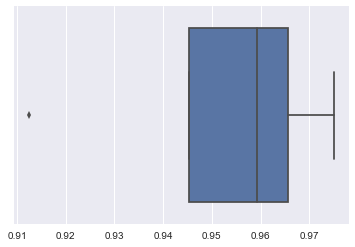


next we try our best model on the Outer-fold experiments [5-fold cross-validation]
outer acc score is  [0.93125000000000002]
outer confusion matrix is  [array([[134,   4],
       [  7,  15]])]


the total list of acc score in the outer-fold experiment is [0.98124999999999996, 0.94374999999999998, 0.90000000000000002, 0.97499999999999998, 0.93125000000000002]
and the mean of acc score in the outer-fold experiment  0.94625
the boxplot for Outer-fold experiments like this 


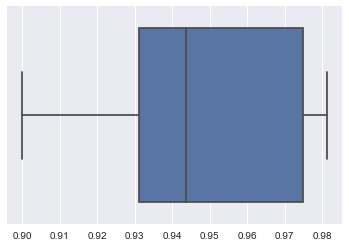

In [236]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.model_selection import KFold
X=pcscores
y, _ = pd.factorize(df['Legendary'])

kf = KFold(n_splits=5)
accstotal=[]


def printing_Kfold_scores(x_train_data,y_train_data):
    fold = KFold(n_splits=4)
    
    # Different parameters
    splitter_param_range = ["uniform","distance"]
    j = 0
    accs_mean=[]
    confusion = []
    accs = []
    for i in [0,1]:
        print('one round of Inner-fold experiments [4-fold cross-validation]')
        print('now the weights is ',splitter_param_range[i])
    
        for train, test in fold.split(x_train_data):
            clt = KNeighborsClassifier(weights=splitter_param_range[i])
            
            clt.fit(x_train_data.iloc[train],y_train_data[train])
            pred = clt.predict(x_train_data.iloc[test])
            acc = accuracy_score(y_train_data[test],pred)
            c_df = confusion_matrix(y_train_data[test],pred)
            accs.append(acc)
            confusion.append(c_df)
            print(' acc score =', acc)
            
        j += 1
        print('')
        print('Mean acc score ', np.mean(accs))
        print('')
        accs_mean.append(np.mean(accs))
    
   
    # determining best splitter
    optimal_k = splitter_param_range[accs_mean.index(max(accs_mean))]
    print("The optimal weight is %s" % optimal_k)
    print('')
    print("the mean acc score of optimal weight is %s" % accs_mean[accs_mean.index(max(accs_mean))])
    print('')
    confustion = np.array(confusion)
    accs = np.array(accs)
    if optimal_k == "uniform":
        bestacc=accs[0:4]
        bestcon=confustion[0:4]
        print('The corresponding confusion matrix is: ', confustion[0:4])
    else:
        bestacc=accs[4:8]
        bestcon=confustion[4:8]
        print('The corresponding confusion matrix is: ', confustion[4:8])
    ax = sns.boxplot(x = bestacc)
    plt.show()
    print('')
    
    return optimal_k, bestcon, accs_mean
        
    
   

       

for train_index, test_index in kf.split(X):
    x_train, y_train = X.iloc[train_index], y[train_index]
    x_test, y_test = X.iloc[test_index], y[test_index]
    
    accs=[]
    confusion_knn = []
    inner=printing_Kfold_scores(x_train,y_train)
    print("next we try our best model on the Outer-fold experiments [5-fold cross-validation]")
    clt = KNeighborsClassifier(weights=inner[0])
    clt.fit(x_train,y_train)
    pred = clt.predict(x_test)
    acc = accuracy_score(y_test,pred)
    c_df = confusion_matrix(y_test,pred)
    accs.append(acc)
    accstotal.append(acc)
    print("outer acc score is ", accs)
    confusion_knn.append(c_df)
    print("outer confusion matrix is ",confusion_knn)
    print('')
    print('')
   
    # determining best splitter
print('the total list of acc score in the outer-fold experiment is',accstotal)
print('and the mean of acc score in the outer-fold experiment ',np.mean(accstotal))
print('the boxplot for Outer-fold experiments like this ')
ax2 = sns.boxplot(x = accstotal)
plt.show()
print('')

# Random Forest

one round of Inner-fold experiments [4-fold cross-validation]
now the criterion is  gini
 acc score = 0.9375
 acc score = 0.91875
 acc score = 0.9625
 acc score = 0.9125

Mean acc score  0.9328125

one round of Inner-fold experiments [4-fold cross-validation]
now the criterion is  entropy
 acc score = 0.94375
 acc score = 0.90625
 acc score = 0.95625
 acc score = 0.90625

Mean acc score  0.93046875

The optimal criterion is gini

the mean acc score of optimal criterion is 0.9328125

The corresponding confusion matrix is:  [[[144   8]
  [  2   6]]

 [[139   3]
  [ 10   8]]

 [[141   5]
  [  1  13]]

 [[133   5]
  [  9  13]]]


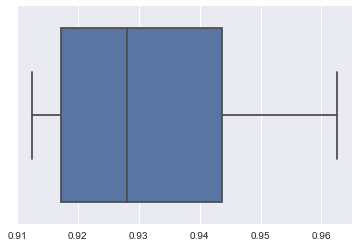


next we try our best model on the Outer-fold experiments [5-fold cross-validation]
outer acc score is  [0.96250000000000002]
outer confusion matrix is  [array([[153,   4],
       [  2,   1]])]


one round of Inner-fold experiments [4-fold cross-validation]
now the criterion is  gini
 acc score = 0.9625
 acc score = 0.925
 acc score = 0.96875
 acc score = 0.91875

Mean acc score  0.94375

one round of Inner-fold experiments [4-fold cross-validation]
now the criterion is  entropy
 acc score = 0.9375
 acc score = 0.91875
 acc score = 0.95625
 acc score = 0.91875

Mean acc score  0.93828125

The optimal criterion is gini

the mean acc score of optimal criterion is 0.94375

The corresponding confusion matrix is:  [[[151   6]
  [  0   3]]

 [[139   3]
  [  9   9]]

 [[144   2]
  [  3  11]]

 [[133   5]
  [  8  14]]]


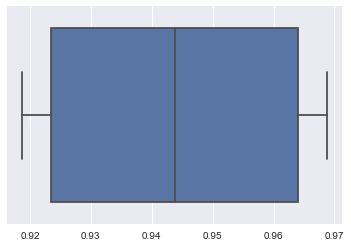


next we try our best model on the Outer-fold experiments [5-fold cross-validation]
outer acc score is  [0.97499999999999998]
outer confusion matrix is  [array([[149,   3],
       [  1,   7]])]


one round of Inner-fold experiments [4-fold cross-validation]
now the criterion is  gini
 acc score = 0.98125
 acc score = 0.975
 acc score = 0.9625
 acc score = 0.9125

Mean acc score  0.9578125

one round of Inner-fold experiments [4-fold cross-validation]
now the criterion is  entropy
 acc score = 0.975
 acc score = 0.9625
 acc score = 0.95625
 acc score = 0.90625

Mean acc score  0.95390625

The optimal criterion is gini

the mean acc score of optimal criterion is 0.9578125

The corresponding confusion matrix is:  [[[156   1]
  [  2   1]]

 [[150   2]
  [  2   6]]

 [[145   1]
  [  5   9]]

 [[136   2]
  [ 12  10]]]


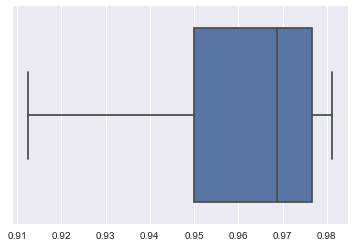


next we try our best model on the Outer-fold experiments [5-fold cross-validation]
outer acc score is  [0.91249999999999998]
outer confusion matrix is  [array([[139,   3],
       [ 11,   7]])]


one round of Inner-fold experiments [4-fold cross-validation]
now the criterion is  gini
 acc score = 0.96875
 acc score = 0.95
 acc score = 0.8875
 acc score = 0.91875

Mean acc score  0.93125

one round of Inner-fold experiments [4-fold cross-validation]
now the criterion is  entropy
 acc score = 0.96875
 acc score = 0.95
 acc score = 0.9
 acc score = 0.9

Mean acc score  0.93046875

The optimal criterion is gini

the mean acc score of optimal criterion is 0.93125

The corresponding confusion matrix is:  [[[154   3]
  [  2   1]]

 [[148   4]
  [  4   4]]

 [[138   4]
  [ 14   4]]

 [[135   3]
  [ 10  12]]]


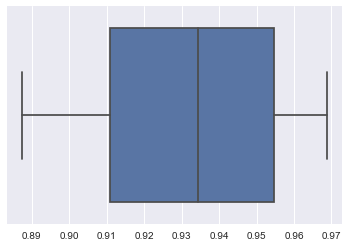


next we try our best model on the Outer-fold experiments [5-fold cross-validation]
outer acc score is  [0.97499999999999998]
outer confusion matrix is  [array([[144,   2],
       [  2,  12]])]


one round of Inner-fold experiments [4-fold cross-validation]
now the criterion is  gini
 acc score = 0.975
 acc score = 0.9625
 acc score = 0.90625
 acc score = 0.9375

Mean acc score  0.9453125

one round of Inner-fold experiments [4-fold cross-validation]
now the criterion is  entropy
 acc score = 0.98125
 acc score = 0.9625
 acc score = 0.9
 acc score = 0.925

Mean acc score  0.94375

The optimal criterion is gini

the mean acc score of optimal criterion is 0.9453125

The corresponding confusion matrix is:  [[[154   3]
  [  1   2]]

 [[149   3]
  [  3   5]]

 [[142   0]
  [ 15   3]]

 [[145   1]
  [  9   5]]]


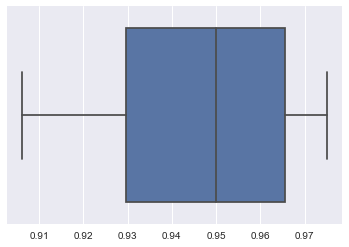


next we try our best model on the Outer-fold experiments [5-fold cross-validation]
outer acc score is  [0.89375000000000004]
outer confusion matrix is  [array([[134,   4],
       [ 13,   9]])]


the total list of acc score in the outer-fold experiment is [0.96250000000000002, 0.97499999999999998, 0.91249999999999998, 0.97499999999999998, 0.89375000000000004]
and the mean of acc score in the outer-fold experiment  0.94375
the boxplot for Outer-fold experiments like this 


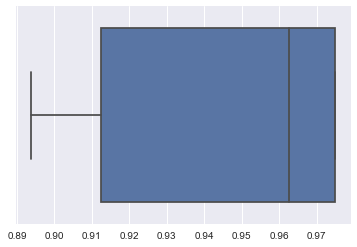

In [237]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.model_selection import KFold
X=pcscores
y, _ = pd.factorize(df['Legendary'])

kf = KFold(n_splits=5)
accstotal=[]


def printing_Kfold_scores(x_train_data,y_train_data):
    fold = KFold(n_splits=4)
    
    # Different parameters
    splitter_param_range = ["gini","entropy"]
    j = 0
    accs_mean=[]
    confusion = []
    accs = []
    for i in [0,1]:
        print('one round of Inner-fold experiments [4-fold cross-validation]')
        print('now the criterion is ',splitter_param_range[i])
    
        for train, test in fold.split(x_train_data):
            clt = RandomForestClassifier(criterion=splitter_param_range[i])
            
            clt.fit(x_train_data.iloc[train],y_train_data[train])
            pred = clt.predict(x_train_data.iloc[test])
            acc = accuracy_score(y_train_data[test],pred)
            c_df = confusion_matrix(y_train_data[test],pred)
            accs.append(acc)
            confusion.append(c_df)
            print(' acc score =', acc)
            
        j += 1
        print('')
        print('Mean acc score ', np.mean(accs))
        print('')
        accs_mean.append(np.mean(accs))
    
   
    # determining best splitter
    optimal_k = splitter_param_range[accs_mean.index(max(accs_mean))]
    print("The optimal criterion is %s" % optimal_k)
    print('')
    print("the mean acc score of optimal criterion is %s" % accs_mean[accs_mean.index(max(accs_mean))])
    print('')
    confustion = np.array(confusion)
    accs = np.array(accs)
    if optimal_k == "gini":
        bestacc=accs[0:4]
        bestcon=confustion[0:4]
        print('The corresponding confusion matrix is: ', confustion[0:4])
    else:
        bestacc=accs[4:8]
        bestcon=confustion[4:8]
        print('The corresponding confusion matrix is: ', confustion[4:8])
    ax = sns.boxplot(x = bestacc)
    plt.show()
    print('')
    
    return optimal_k, bestcon, accs_mean
        
    
   

       

for train_index, test_index in kf.split(X):
    x_train, y_train = X.iloc[train_index], y[train_index]
    x_test, y_test = X.iloc[test_index], y[test_index]
    confusion=[]
    accs=[]
    
    inner=printing_Kfold_scores(x_train,y_train)
    print("next we try our best model on the Outer-fold experiments [5-fold cross-validation]")
    clt = RandomForestClassifier(criterion=inner[0])
    clt.fit(x_train,y_train)
    pred = clt.predict(x_test)
    acc = accuracy_score(y_test,pred)
    c_df = confusion_matrix(y_test,pred)
    accs.append(acc)
    accstotal.append(acc)
    print("outer acc score is ", accs)
    confusion.append(c_df)
    print("outer confusion matrix is ",confusion)
    print('')
    print('')
   
    # determining best splitter
print('the total list of acc score in the outer-fold experiment is',accstotal)
print('and the mean of acc score in the outer-fold experiment ',np.mean(accstotal))
print('the boxplot for Outer-fold experiments like this ')
ax3 = sns.boxplot(x = accstotal)
plt.show()
print('')

# AdaBoost

one round of Inner-fold experiments [4-fold cross-validation]
now the algorithm is  SAMME
 acc score = 0.93125
 acc score = 0.91875
 acc score = 0.95625
 acc score = 0.91875

Mean acc score  0.93125

one round of Inner-fold experiments [4-fold cross-validation]
now the algorithm is  SAMME.R
 acc score = 0.925
 acc score = 0.89375
 acc score = 0.95
 acc score = 0.9

Mean acc score  0.92421875

The optimal algorithm is SAMME

the mean acc score of optimal algorithm is 0.93125

The corresponding confusion matrix is:  [[[142  10]
  [  1   7]]

 [[137   5]
  [  8  10]]

 [[143   3]
  [  4  10]]

 [[133   5]
  [  8  14]]]


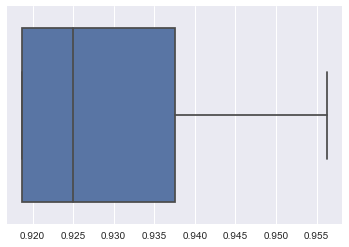


next we try our best model on the Outer-fold experiments [5-fold cross-validation]
outer acc score is  [0.97499999999999998]
outer confusion matrix is  [array([[153,   4],
       [  0,   3]])]


one round of Inner-fold experiments [4-fold cross-validation]
now the algorithm is  SAMME
 acc score = 0.95
 acc score = 0.93125
 acc score = 0.96875
 acc score = 0.9125

Mean acc score  0.940625

one round of Inner-fold experiments [4-fold cross-validation]
now the algorithm is  SAMME.R
 acc score = 0.94375
 acc score = 0.9
 acc score = 0.95625
 acc score = 0.93125

Mean acc score  0.93671875

The optimal algorithm is SAMME

the mean acc score of optimal algorithm is 0.940625

The corresponding confusion matrix is:  [[[150   7]
  [  1   2]]

 [[137   5]
  [  6  12]]

 [[143   3]
  [  2  12]]

 [[133   5]
  [  9  13]]]


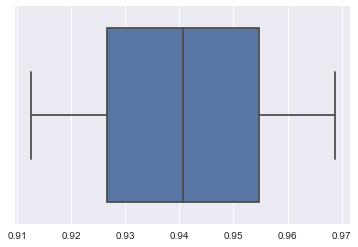


next we try our best model on the Outer-fold experiments [5-fold cross-validation]
outer acc score is  [0.96250000000000002]
outer confusion matrix is  [array([[147,   5],
       [  1,   7]])]


one round of Inner-fold experiments [4-fold cross-validation]
now the algorithm is  SAMME
 acc score = 0.9875
 acc score = 0.95
 acc score = 0.95625
 acc score = 0.9375

Mean acc score  0.9578125

one round of Inner-fold experiments [4-fold cross-validation]
now the algorithm is  SAMME.R
 acc score = 0.98125
 acc score = 0.93125
 acc score = 0.94375
 acc score = 0.90625

Mean acc score  0.94921875

The optimal algorithm is SAMME

the mean acc score of optimal algorithm is 0.9578125

The corresponding confusion matrix is:  [[[155   2]
  [  0   3]]

 [[144   8]
  [  0   8]]

 [[145   1]
  [  6   8]]

 [[135   3]
  [  7  15]]]


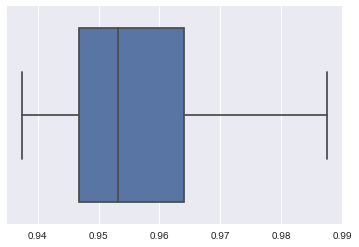


next we try our best model on the Outer-fold experiments [5-fold cross-validation]
outer acc score is  [0.91874999999999996]
outer confusion matrix is  [array([[137,   5],
       [  8,  10]])]


one round of Inner-fold experiments [4-fold cross-validation]
now the algorithm is  SAMME
 acc score = 0.9625
 acc score = 0.95625
 acc score = 0.9
 acc score = 0.9

Mean acc score  0.9296875

one round of Inner-fold experiments [4-fold cross-validation]
now the algorithm is  SAMME.R
 acc score = 0.96875
 acc score = 0.9625
 acc score = 0.8875
 acc score = 0.9

Mean acc score  0.9296875

The optimal algorithm is SAMME

the mean acc score of optimal algorithm is 0.9296875

The corresponding confusion matrix is:  [[[151   6]
  [  0   3]]

 [[146   6]
  [  1   7]]

 [[138   4]
  [ 12   6]]

 [[135   3]
  [ 13   9]]]


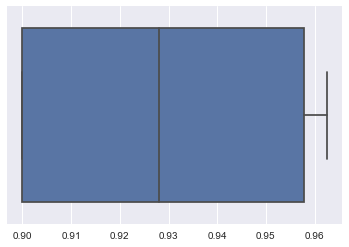


next we try our best model on the Outer-fold experiments [5-fold cross-validation]
outer acc score is  [0.96250000000000002]
outer confusion matrix is  [array([[143,   3],
       [  3,  11]])]


one round of Inner-fold experiments [4-fold cross-validation]
now the algorithm is  SAMME
 acc score = 0.975
 acc score = 0.96875
 acc score = 0.9125
 acc score = 0.95625

Mean acc score  0.953125

one round of Inner-fold experiments [4-fold cross-validation]
now the algorithm is  SAMME.R
 acc score = 0.9625
 acc score = 0.975
 acc score = 0.94375
 acc score = 0.9625

Mean acc score  0.95703125

The optimal algorithm is SAMME.R

the mean acc score of optimal algorithm is 0.95703125

The corresponding confusion matrix is:  [[[151   6]
  [  0   3]]

 [[149   3]
  [  1   7]]

 [[140   2]
  [  7  11]]

 [[145   1]
  [  5   9]]]


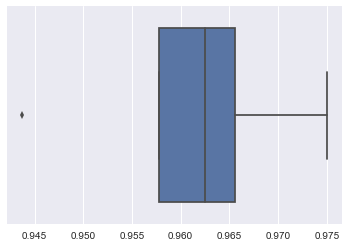


next we try our best model on the Outer-fold experiments [5-fold cross-validation]
outer acc score is  [0.90625]
outer confusion matrix is  [array([[133,   5],
       [ 10,  12]])]


the total list of acc score in the outer-fold experiment is [0.97499999999999998, 0.96250000000000002, 0.91874999999999996, 0.96250000000000002, 0.90625]
and the mean of acc score in the outer-fold experiment  0.945
the boxplot for Outer-fold experiments like this 


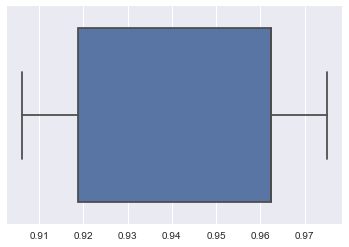

In [238]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.model_selection import KFold
X=pcscores
y, _ = pd.factorize(df['Legendary'])

kf = KFold(n_splits=5)
accstotal=[]


def printing_Kfold_scores(x_train_data,y_train_data):
    fold = KFold(n_splits=4)
    
    # Different parameters
    splitter_param_range = ["SAMME","SAMME.R"]
    j = 0
    accs_mean=[]
    confusion = []
    accs = []
    for i in [0,1]:
        print('one round of Inner-fold experiments [4-fold cross-validation]')
        print('now the algorithm is ',splitter_param_range[i])
    
        for train, test in fold.split(x_train_data):
            clt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm=splitter_param_range[i])
            
            clt.fit(x_train_data.iloc[train],y_train_data[train])
            pred = clt.predict(x_train_data.iloc[test])
            acc = accuracy_score(y_train_data[test],pred)
            c_df = confusion_matrix(y_train_data[test],pred)
            accs.append(acc)
            confusion.append(c_df)
            print(' acc score =', acc)
            
        j += 1
        print('')
        print('Mean acc score ', np.mean(accs))
        print('')
        accs_mean.append(np.mean(accs))
    
   
    # determining best splitter
    optimal_k = splitter_param_range[accs_mean.index(max(accs_mean))]
    print("The optimal algorithm is %s" % optimal_k)
    print('')
    print("the mean acc score of optimal algorithm is %s" % accs_mean[accs_mean.index(max(accs_mean))])
    print('')
    confustion = np.array(confusion)
    accs = np.array(accs)
    if optimal_k == "SAMME":
        bestacc=accs[0:4]
        bestcon=confustion[0:4]
        print('The corresponding confusion matrix is: ', confustion[0:4])
    else:
        bestacc=accs[4:8]
        bestcon=confustion[4:8]
        print('The corresponding confusion matrix is: ', confustion[4:8])
    ax = sns.boxplot(x = bestacc)
    plt.show()
    print('')
    
    return optimal_k, bestcon, accs_mean
        
    
   

       

for train_index, test_index in kf.split(X):
    x_train, y_train = X.iloc[train_index], y[train_index]
    x_test, y_test = X.iloc[test_index], y[test_index]
    confusion=[]
    accs=[]
    
    inner=printing_Kfold_scores(x_train,y_train)
    print("next we try our best model on the Outer-fold experiments [5-fold cross-validation]")
    clt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm=inner[0])
    clt.fit(x_train,y_train)
    pred = clt.predict(x_test)
    acc = accuracy_score(y_test,pred)
    c_df = confusion_matrix(y_test,pred)
    accs.append(acc)
    accstotal.append(acc)
    print("outer acc score is ", accs)
    confusion.append(c_df)
    print("outer confusion matrix is ",confusion)
    print('')
    print('')
   
    # determining best splitter
print('the total list of acc score in the outer-fold experiment is',accstotal)
print('and the mean of acc score in the outer-fold experiment ',np.mean(accstotal))
print('the boxplot for Outer-fold experiments like this ')
ax4 = sns.boxplot(x = accstotal)
plt.show()
print('')

# SVM

one round of Inner-fold experiments [4-fold cross-validation]
now the C is  0.001
 acc score = 0.95
 acc score = 0.8875
 acc score = 0.9125
 acc score = 0.8625

Mean acc score  0.903125

one round of Inner-fold experiments [4-fold cross-validation]
now the C is  0.1
 acc score = 0.95
 acc score = 0.8875
 acc score = 0.9125
 acc score = 0.8625

Mean acc score  0.903125

The optimal C is 0.001

the mean acc score of optimal C is 0.903125

The corresponding confusion matrix is:  [[[152   0]
  [  8   0]]

 [[142   0]
  [ 18   0]]

 [[146   0]
  [ 14   0]]

 [[138   0]
  [ 22   0]]]


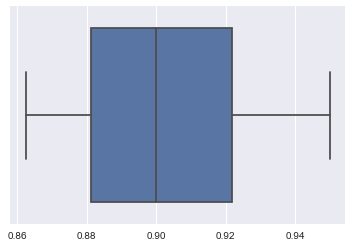


next we try our best model on the Outer-fold experiments [5-fold cross-validation]
outer acc score is  [0.98124999999999996]
outer confusion matrix is  [array([[157,   0],
       [  3,   0]])]


one round of Inner-fold experiments [4-fold cross-validation]
now the C is  0.001
 acc score = 0.98125
 acc score = 0.8875
 acc score = 0.9125
 acc score = 0.8625

Mean acc score  0.9109375

one round of Inner-fold experiments [4-fold cross-validation]
now the C is  0.1
 acc score = 0.98125
 acc score = 0.8875
 acc score = 0.9125
 acc score = 0.8625

Mean acc score  0.9109375

The optimal C is 0.001

the mean acc score of optimal C is 0.9109375

The corresponding confusion matrix is:  [[[157   0]
  [  3   0]]

 [[142   0]
  [ 18   0]]

 [[146   0]
  [ 14   0]]

 [[138   0]
  [ 22   0]]]


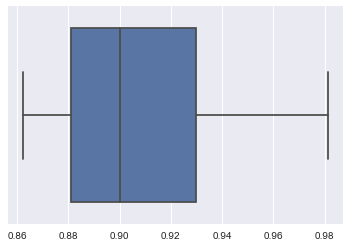


next we try our best model on the Outer-fold experiments [5-fold cross-validation]
outer acc score is  [0.94999999999999996]
outer confusion matrix is  [array([[152,   0],
       [  8,   0]])]


one round of Inner-fold experiments [4-fold cross-validation]
now the C is  0.001
 acc score = 0.98125
 acc score = 0.95
 acc score = 0.9125
 acc score = 0.8625

Mean acc score  0.9265625

one round of Inner-fold experiments [4-fold cross-validation]
now the C is  0.1
 acc score = 0.98125
 acc score = 0.95
 acc score = 0.9125
 acc score = 0.8625

Mean acc score  0.9265625

The optimal C is 0.001

the mean acc score of optimal C is 0.9265625

The corresponding confusion matrix is:  [[[157   0]
  [  3   0]]

 [[152   0]
  [  8   0]]

 [[146   0]
  [ 14   0]]

 [[138   0]
  [ 22   0]]]


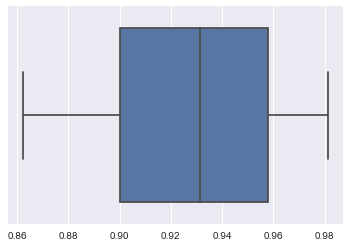


next we try our best model on the Outer-fold experiments [5-fold cross-validation]
outer acc score is  [0.88749999999999996]
outer confusion matrix is  [array([[142,   0],
       [ 18,   0]])]


one round of Inner-fold experiments [4-fold cross-validation]
now the C is  0.001
 acc score = 0.98125
 acc score = 0.95
 acc score = 0.8875
 acc score = 0.8625

Mean acc score  0.9203125

one round of Inner-fold experiments [4-fold cross-validation]
now the C is  0.1
 acc score = 0.98125
 acc score = 0.95
 acc score = 0.8875
 acc score = 0.8625

Mean acc score  0.9203125

The optimal C is 0.1

the mean acc score of optimal C is 0.9203125

The corresponding confusion matrix is:  [[[157   0]
  [  3   0]]

 [[152   0]
  [  8   0]]

 [[142   0]
  [ 18   0]]

 [[138   0]
  [ 22   0]]]


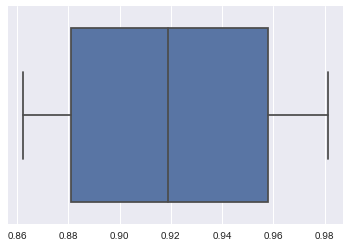


next we try our best model on the Outer-fold experiments [5-fold cross-validation]
outer acc score is  [0.91249999999999998]
outer confusion matrix is  [array([[146,   0],
       [ 14,   0]])]


one round of Inner-fold experiments [4-fold cross-validation]
now the C is  0.001
 acc score = 0.98125
 acc score = 0.95
 acc score = 0.8875
 acc score = 0.9125

Mean acc score  0.9328125

one round of Inner-fold experiments [4-fold cross-validation]
now the C is  0.1
 acc score = 0.98125
 acc score = 0.95
 acc score = 0.8875
 acc score = 0.9125

Mean acc score  0.9328125

The optimal C is 0.001

the mean acc score of optimal C is 0.9328125

The corresponding confusion matrix is:  [[[157   0]
  [  3   0]]

 [[152   0]
  [  8   0]]

 [[142   0]
  [ 18   0]]

 [[146   0]
  [ 14   0]]]


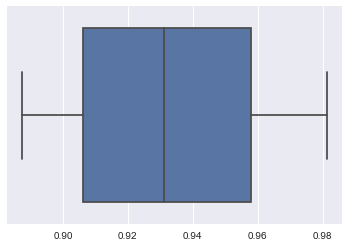


next we try our best model on the Outer-fold experiments [5-fold cross-validation]
outer acc score is  [0.86250000000000004]
outer confusion matrix is  [array([[138,   0],
       [ 22,   0]])]


the total list of acc score in the outer-fold experiment is [0.98124999999999996, 0.94999999999999996, 0.88749999999999996, 0.91249999999999998, 0.86250000000000004]
and the mean of acc score in the outer-fold experiment  0.91875
the boxplot for Outer-fold experiments like this 


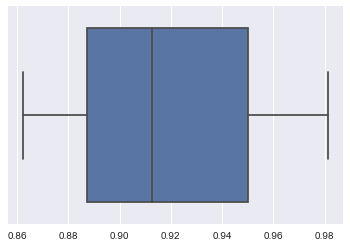

In [239]:
from sklearn import svm
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.model_selection import KFold
X=pcscores
y, _ = pd.factorize(df['Legendary'])

kf = KFold(n_splits=5)
accstotal=[]


def printing_Kfold_scores(x_train_data,y_train_data):
    fold = KFold(n_splits=4)
    
    # Different parameters
    splitter_param_range = [0.001,0.1]
    j = 0
    accs_mean=[]
    confusion = []
    accs = []
    for i in [0,1]:
        print('one round of Inner-fold experiments [4-fold cross-validation]')
        print('now the C is ',splitter_param_range[i])
    
        for train, test in fold.split(x_train_data):
            clt = svm.SVC(C=splitter_param_range[i])
            
            clt.fit(x_train_data.iloc[train],y_train_data[train])
            pred = clt.predict(x_train_data.iloc[test])
            acc = accuracy_score(y_train_data[test],pred)
            c_df = confusion_matrix(y_train_data[test],pred)
            accs.append(acc)
            confusion.append(c_df)
            print(' acc score =', acc)
            
        j += 1
        print('')
        print('Mean acc score ', np.mean(accs))
        print('')
        accs_mean.append(np.mean(accs))
    
   
    # determining best splitter
    optimal_k = splitter_param_range[accs_mean.index(max(accs_mean))]
    print("The optimal C is %s" % optimal_k)
    print('')
    print("the mean acc score of optimal C is %s" % accs_mean[accs_mean.index(max(accs_mean))])
    print('')
    confustion = np.array(confusion)
    accs = np.array(accs)
    if optimal_k == 0.001:
        bestacc=accs[0:4]
        bestcon=confustion[0:4]
        print('The corresponding confusion matrix is: ', confustion[0:4])
    else:
        bestacc=accs[4:8]
        bestcon=confustion[4:8]
        print('The corresponding confusion matrix is: ', confustion[4:8])
    ax = sns.boxplot(x = bestacc)
    plt.show()
    print('')
    
    return optimal_k, bestcon, accs_mean
        
    
   

       

for train_index, test_index in kf.split(X):
    x_train, y_train = X.iloc[train_index], y[train_index]
    x_test, y_test = X.iloc[test_index], y[test_index]
    confusion=[]
    accs=[]
    
    inner=printing_Kfold_scores(x_train,y_train)
    print("next we try our best model on the Outer-fold experiments [5-fold cross-validation]")
    clt = svm.SVC(C=inner[0])
    clt.fit(x_train,y_train)
    pred = clt.predict(x_test)
    acc = accuracy_score(y_test,pred)
    c_df = confusion_matrix(y_test,pred)
    accs.append(acc)
    accstotal.append(acc)
    print("outer acc score is ", accs)
    confusion.append(c_df)
    print("outer confusion matrix is ",confusion)
    print('')
    print('')
   
    # determining best splitter
print('the total list of acc score in the outer-fold experiment is',accstotal)
print('and the mean of acc score in the outer-fold experiment ',np.mean(accstotal))
print('the boxplot for Outer-fold experiments like this ')
ax5 = sns.boxplot(x = accstotal)
plt.show()
print('')

# Discussion

In this project, I learned how to use Double-Resampling methods for complexity control and for estimating prediction performance of a method  and implment learning algorithms that have been discussed in class. Also, I know that tuning a parameter can get different result, it helps me a lot. 

# Conclusion

The accuracy score of Decision Tree (DT) is 0.9425
The accuracy score of k-Nearest Neighbor (k-NN) is 0.94625
The accuracy score of Random Forests (RF) is 0.94125
The accuracy score of AdaBoost is 0.945
The accuracy score of Support Vector Machine (SVM) is 0.91875
So the k-Nearest Neighbor (k-NN) works best in this dataset. 
